In [1]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 288.8 kB/s eta 0:00:00m eta 0:00:010:00:07


# 1- Transformée de Fourrier

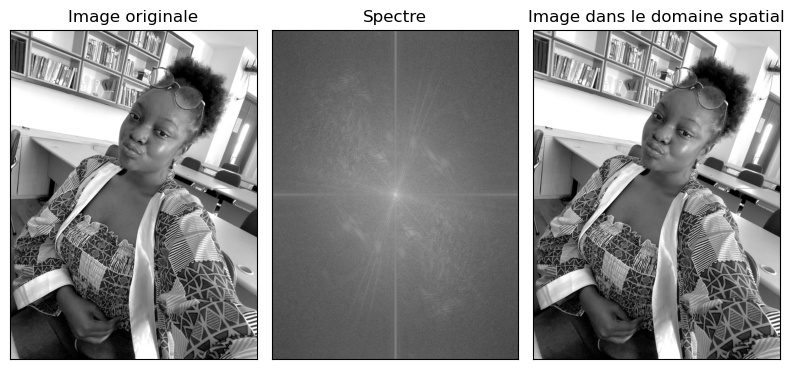

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread('/home/ericka/Pictures/Ericka.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculer la transformée de Fourier
fourier_transform = np.fft.fft2(image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Calculer le spectre
magnitude_spectrum = 20 * np.log(np.abs(fourier_transform_shifted))

# Calculer la transformée de Fourier inverse
inverse_fourier_transform_shifted = np.fft.ifftshift(fourier_transform_shifted)
inverse_fourier_transform = np.fft.ifft2(inverse_fourier_transform_shifted)
inverse_fourier_transform = np.abs(inverse_fourier_transform)

# Afficher les images
plt.figure(figsize=(8, 12))

# Afficher l'image originale
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])

# Afficher le spectre
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectre'), plt.xticks([]), plt.yticks([])

# Afficher l'image dans le domaine spatial (inverse de la transformée de Fourier)
plt.subplot(133)
plt.imshow(inverse_fourier_transform, cmap='gray')
plt.title('Image dans le domaine spatial'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


INTERPRETATION: 

1. **Image originale** :
   - L'image originale est affichée en niveaux de gris. Elle représente l'intensité lumineuse de chaque pixel dans l'image.
   - C'est une visualisation de l'image originale avant l'analyse en fréquence.

2. **Spectre de Fourier** :
   - Le spectre de Fourier est une représentation de la composition fréquentielle de l'image.
   - Dans cette représentation, les basses fréquences sont situées au centre de l'image, tandis que les hautes fréquences sont à la périphérie.
   - L'échelle de gris indique l'intensité des différentes fréquences.
   - Les régions lumineuses du spectre correspondent aux fréquences dominantes de l'image.

   Pour mieux interpréter le spectre de Fourier, on observe ceci :
   - La croix au centre : Représente la composante continue ou la fréquence nulle.
   - Les formes concentriques : Représentent les différentes composantes de fréquence dans l'image.
   - Les fréquences basses au centre et hautes aux bords : Indiquent la variation de fréquence dans l'image.
  
 Ainsi, dans cet image on constate qu'elle contient beaucoup plus de base fréquences que de hautes fréquences
 
3. **Image dans le domaine spatial** :
   - L'image obtenue après la transformée de Fourier inverse est affichée.
   - Cette image est reconstruite à partir du spectre et représente l'image dans le domaine spatial.

Ce code met en évidence la transformation de l'image entre le domaine spatial (image originale) et le domaine fréquentiel (spectre de Fourier) et inversement


# 2- Filtre passe-bas et pase-haut

## 2-1- Filtre passe-bas 

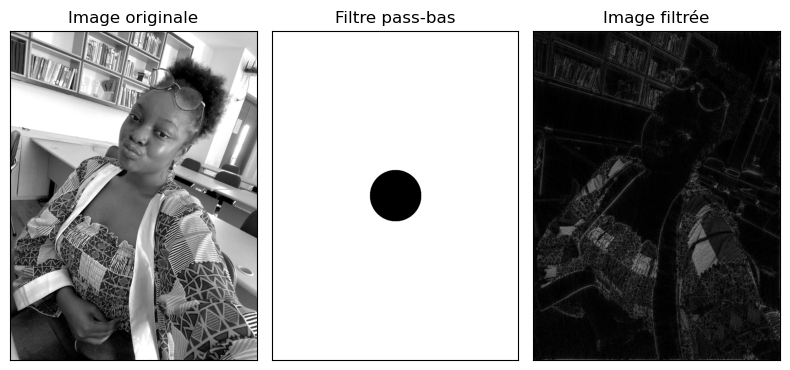

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('/home/ericka/Pictures/Ericka.jpeg', cv2.IMREAD_GRAYSCALE)

# Appliquer la transformée de Fourier
fourier_transform = np.fft.fft2(image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Créer un filtre pass-bas dans le domaine fréquentiel
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Initialisation de la fréquence de coupure (le rayon du cercle) pour le filtre pass-bas
r = 100

# Créer un masque pour le filtre pass-bas
mask = np.ones((rows, cols), np.uint8)
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Appliquer le filtre
filtered_transform_shifted = fourier_transform_shifted * mask

# Appliquer la transformée de Fourier inverse pour l'image filtrée
filtered_transform = np.fft.ifftshift(filtered_transform_shifted)
filtered_image = np.fft.ifft2(filtered_transform)
filtered_image = np.abs(filtered_image)

# Afficher les résultats
plt.figure(figsize=(8, 8))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Filtre pass-bas'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Image filtrée'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


INTEPRÉTATION:

1. **Image originale** (première image) : C'est l'image d'origine en niveaux de gris.

2. **Filtre pass-bas** (deuxième image) : C'est un masque créé dans le domaine fréquentiel. Les pixels blancs représentent les fréquences basses (gardées) et les pixels noirs représentent les fréquences hautes (filtrées). Le filtre est un cercle centré sur les basses fréquences que nous voulons garder.

3. **Image filtrée** (troisième image) : C'est l'image résultante après avoir appliqué le filtre pass-bas dans le domaine fréquentiel et effectué la transformée de Fourier inverse. Cette image est le résultat de la multiplication de la transformée de Fourier de l'image originale par le filtre pass-bas.

En modifiant le rayon du cercle pour le filtre pass-bas, on observe comment les détails dans l'image sont modifiés. Un rayon plus grand permettra de conserver plus de basses fréquences, ce qui signifie une image filtrée avec moins de détails, tandis qu'un rayon plus petit permettra de filtrer davantage d'informations et de conserver principalement les basses fréquences.

L'objectif principal de ce processus est d'illustrer visuellement comment un filtre pass-bas affecte l'image en éliminant les hautes fréquences et en conservant les basses fréquences.

## 2-2- Filtre passe haut

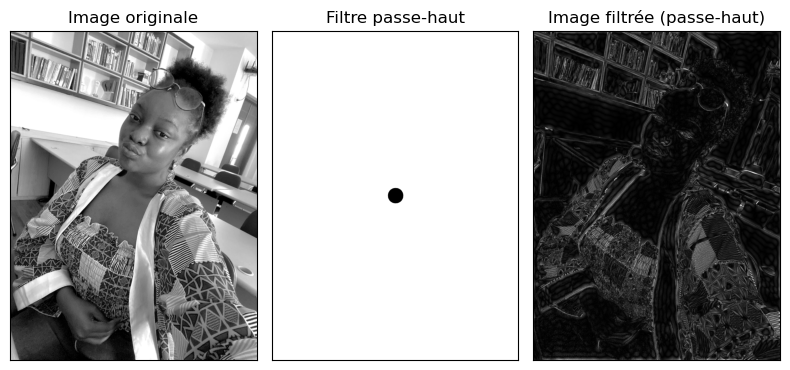

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('/home/ericka/Pictures/Ericka.jpeg', cv2.IMREAD_GRAYSCALE)

# Appliquer la transformée de Fourier
fourier_transform = np.fft.fft2(image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Créer un filtre passe-haut dans le domaine fréquentiel
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Initialisation de la fréquence de coupure (le rayon du cercle) pour le filtre pass-bas
r = 30

# Créer un masque pour le filtre passe-haut
mask = np.zeros((rows, cols), np.uint8)
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 > r*r
mask[mask_area] = 1

# Appliquer le filtre
filtered_transform_shifted = fourier_transform_shifted * mask

# Appliquer la transformée de Fourier inverse pour l'image filtrée
filtered_transform = np.fft.ifftshift(filtered_transform_shifted)
filtered_image = np.fft.ifft2(filtered_transform)
filtered_image = np.abs(filtered_image)

# Afficher les résultats
plt.figure(figsize=(8, 8))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Filtre passe-haut'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Image filtrée (passe-haut)'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


INTERPRETATION: Dans ce code, nous créons un filtre passe-haut en inversant le masque par rapport au filtre passe-bas. Le reste du processus est similaire au filtre passe-bas.

1. **Image originale** :
   - C'est l'image initiale en niveaux de gris que nous avons chargée.

2. **Filtre passe-haut** :
   - C'est le masque du filtre passe-haut que nous avons créé.
   - Dans ce masque, les pixels blancs représentent les hautes fréquences que nous voulons laisser passer.
   - Les pixels noirs représentent les basses fréquences que nous voulons atténuer.

3. **Image filtrée (passe-haut)** :
   - C'est l'image obtenue après avoir appliqué le filtre passe-haut dans le domaine fréquentiel.
   - Les hautes fréquences ont été accentuées, ce qui met en évidence les bords et les détails de l'image.
   - Les basses fréquences ont été atténuées, ce qui permet de mettre en évidence les variations rapides dans l'image.

L'application du filtre passe-haut a pour effet de mettre en évidence les contours et les détails de l'image, ce qui peut améliorer la perception des caractéristiques importantes de l'image. Les zones de forte variation d'intensité sont accentuées, tandis que les zones de faible variation sont atténuées. Les résultats peuvent varier en fonction des paramètres du filtre, comme dans notre cas le rayon du cercle utilisé pour créer le masque passe-haut.

# 3- Filtrer des bruits sinus

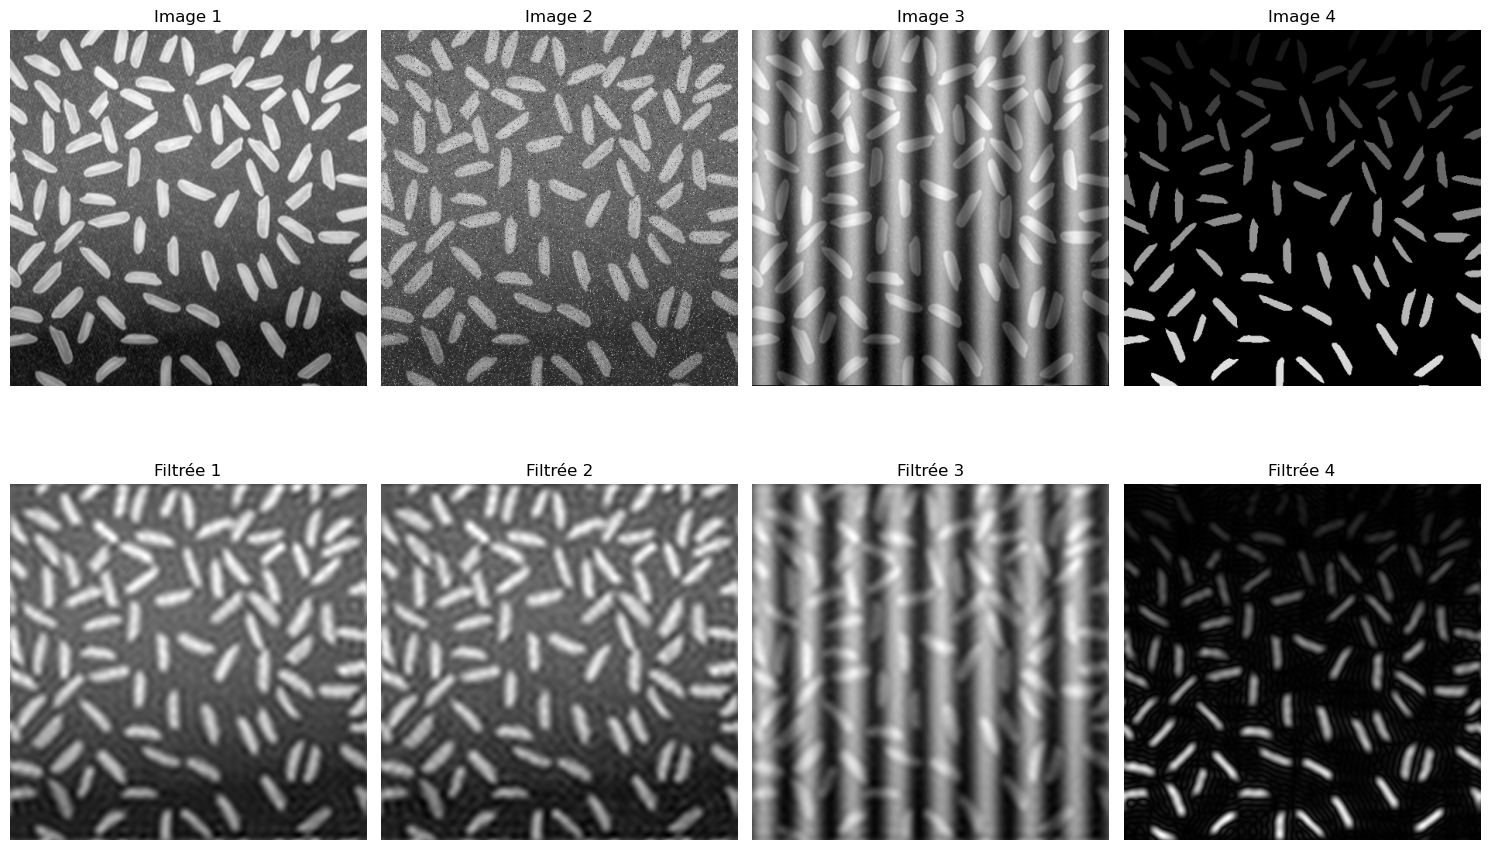

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger les images
images = [
    cv2.imread('/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png', cv2.IMREAD_GRAYSCALE),
    cv2.imread('/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png', cv2.IMREAD_GRAYSCALE),
    cv2.imread('/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', cv2.IMREAD_GRAYSCALE),
    cv2.imread('/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png', cv2.IMREAD_GRAYSCALE)
]

# Fréquence de coupure pour le filtre passe-bas
cutoff_frequency = 30  # Ajustez cette valeur selon vos besoins

# Appliquer le filtre passe-bas et afficher les résultats
plt.figure(figsize=(15, 10))
for i, image in enumerate(images, start=1):
    # Appliquer la transformée de Fourier
    fourier_transform = np.fft.fft2(image)
    fourier_transform_shifted = np.fft.fftshift(fourier_transform)

    # Créer un masque pour le filtre passe-bas
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff_frequency:crow + cutoff_frequency,
         ccol - cutoff_frequency:ccol + cutoff_frequency] = 1

    # Appliquer le filtre
    filtered_transform_shifted = fourier_transform_shifted * mask

    # Appliquer la transformée de Fourier inverse pour l'image filtrée
    filtered_transform = np.fft.ifftshift(filtered_transform_shifted)
    filtered_image = np.fft.ifft2(filtered_transform)
    filtered_image = np.abs(filtered_image)

    # Afficher les résultats
    plt.subplot(2, 4, i), plt.imshow(image, cmap='gray')
    plt.title(f'Image {i}'), plt.axis('off')

    plt.subplot(2, 4, i + 4), plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtrée {i}'), plt.axis('off')

plt.tight_layout()
plt.show()


INTERPRETATION: Le code présenté applique un filtre passe-bas sur quatre images différentes pour réduire les bruits sinusoïdaux.


1. **Image originale (Image 1 à Image 4)** : Ces images représentent les images originales sur lesquelles nous allons appliquer le filtrage.

2. **Images filtrées (Filtrée 1 à Filtrée 4)** : Ces images montrent le résultat du filtrage en utilisant un filtre passe-bas dans le domaine fréquentiel avec une fréquence de coupure prédéfinie (`cutoff_frequency`). Les hautes fréquences sont atténuées, réduisant ainsi les bruits sinusoïdaux.

L'objectif du filtrage passe-bas est de réduire les hautes fréquences présentes dans les images, ce qui est souvent associé aux bruits et aux détails fins. Le paramètre `cutoff_frequency` contrôle le niveau de suppression des hautes fréquences.

L'interprétation des résultats dépendra des caractéristiques spécifiques des images que vous avez utilisées. Si vous pouvez fournir des détails sur les images d'entrée et les résultats obtenus, je pourrai vous fournir une interprétation plus précise.